In [2]:
import os
cwd = os.getcwd()

In [2]:
cwd

'/Users/revanthkota'

In [3]:
os.chdir('/Users/revanthkota/downloads')

In [37]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,20

In [38]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('LTOTALNSA.csv', header=0) 

### LTOTALNSA.csv: Light weight vehicle sales data.

In [39]:
import statsmodels.api as sm

In [40]:
decomposed = sm.tsa.seasonal_decompose(series.values, model='additive' ,freq=12)

In [41]:
import matplotlib.pyplot as plt

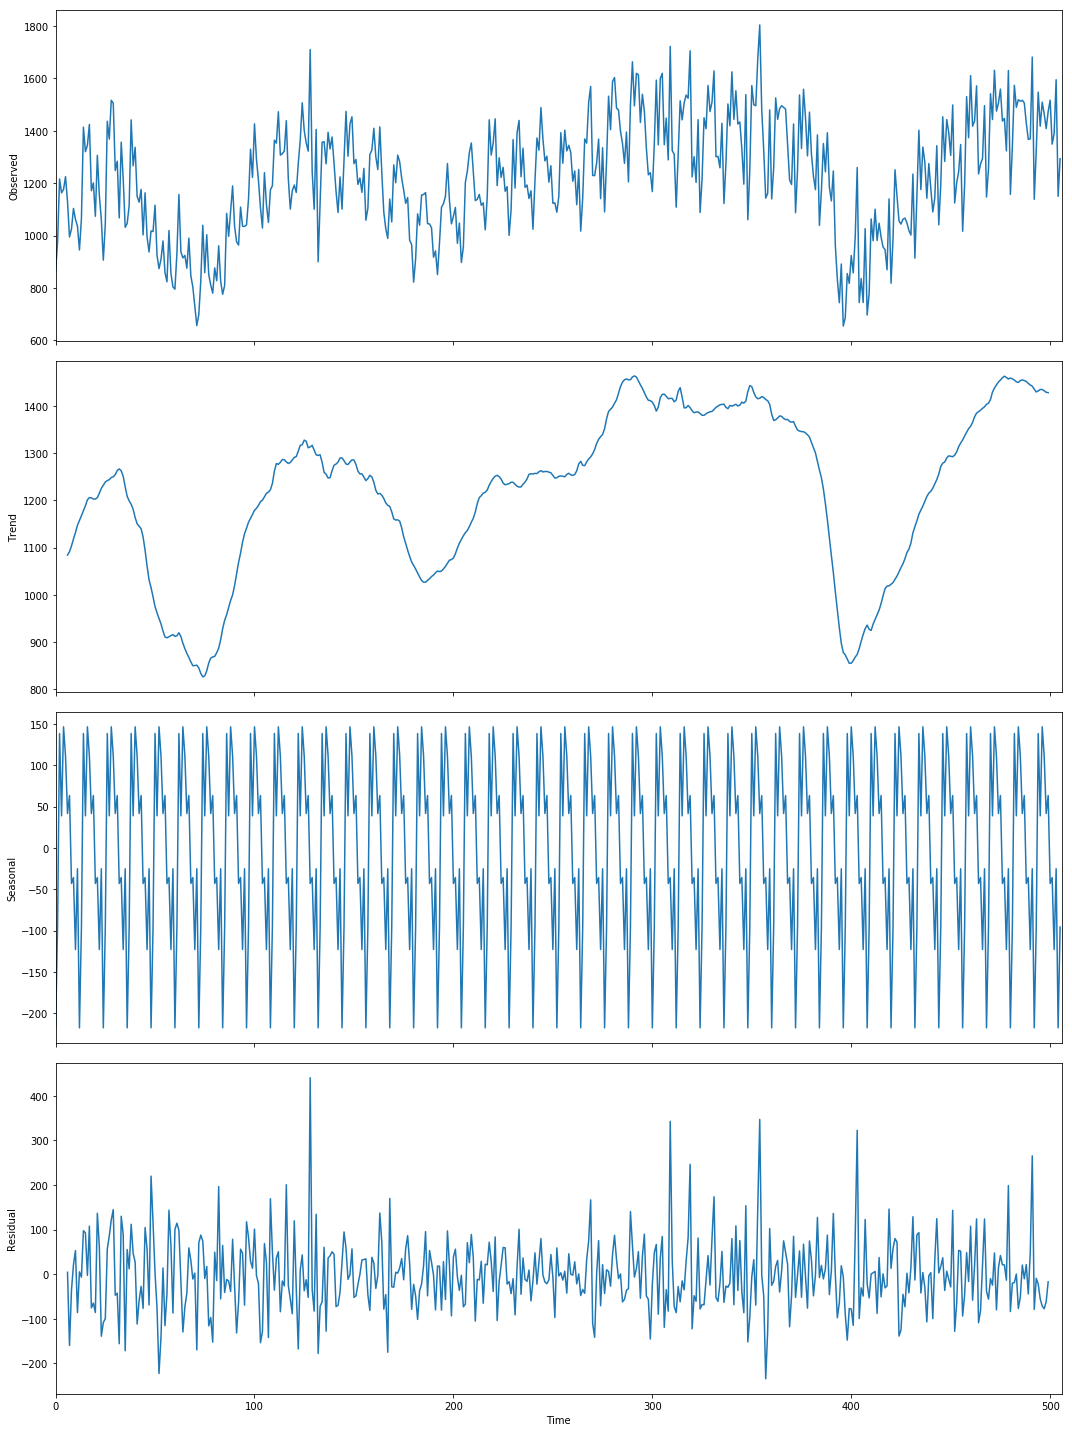

In [43]:
decomposed.plot()
plt.show()

## Prediction Accuracy of Linear Processes : 

In [44]:
# test of stationarity: Dickey fuller test:

from statsmodels.tsa.stattools import adfuller

In [45]:
# Dickey fuller test:

x = series.values
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.056715
p-value: 0.029927
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


### Since the P value of above data is less than 0.05, we can say that Light weight vehicle sales data is stationary
### Hence we need not do any kind of differencing to stationarize the data

In [46]:
import statsmodels.graphics.tsaplots as tsaplots

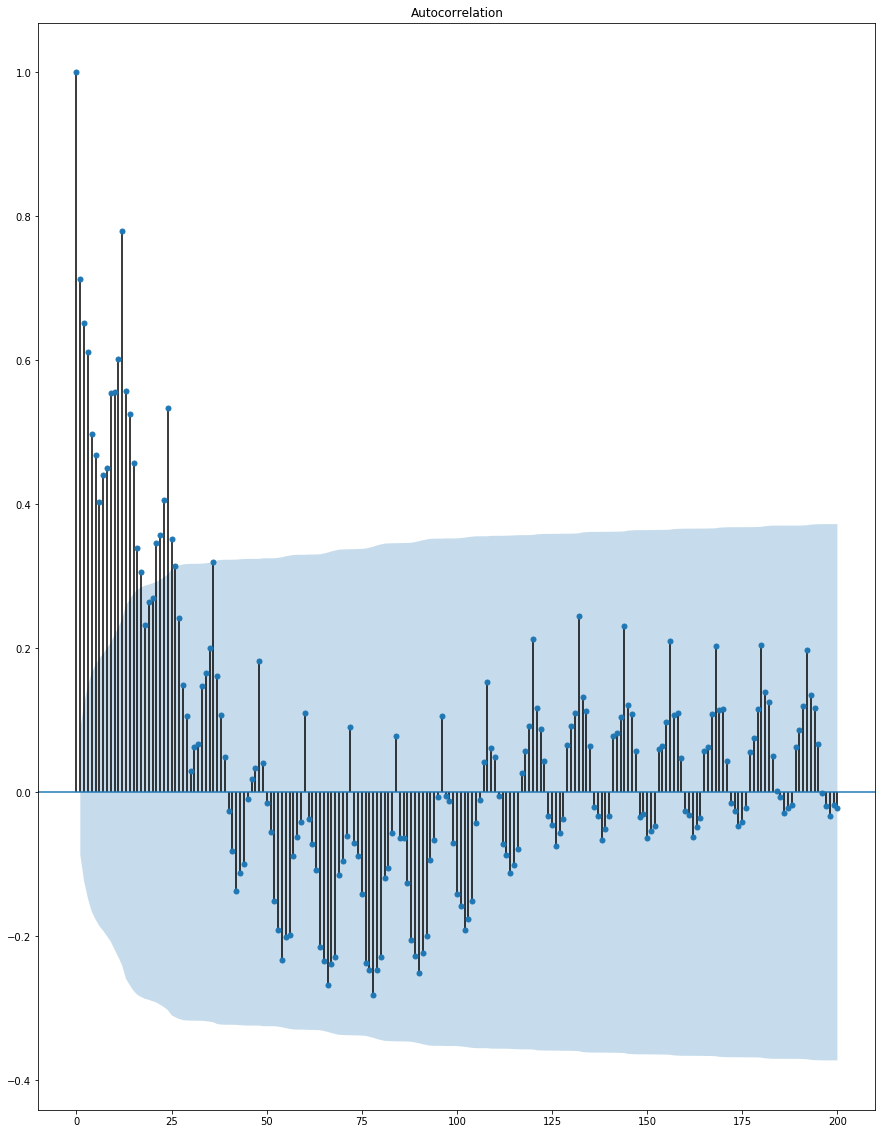

In [48]:
tsaplots.plot_acf(series.values, lags = 200)

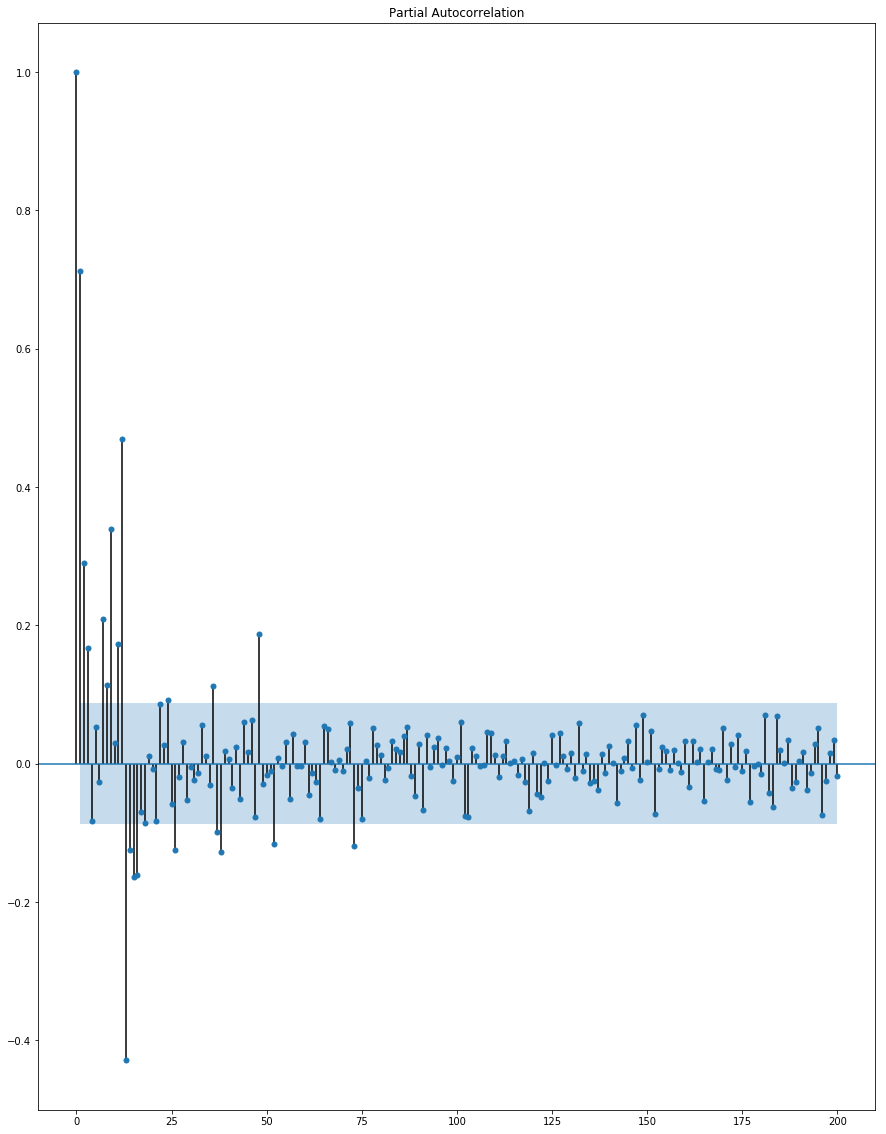

In [49]:
tsaplots.plot_pacf(series.values, lags = 200)

### As both ACF and PACF plots decrease geometrically, we can say that there are AR and MA terms in the data 

### In the below code, we are performing a grided search to determine the order of SARIMA MODEL that can explain underlying data generation process of Light vehicle sales.

In [50]:
import itertools

In [51]:
p = d = q = range(0,3)

pdq = list(itertools.product(p,d,q))

In [52]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [53]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7842.552975756198
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:7219.919837636688
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6115.9781667933585
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:5972.542254225153
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:6022.45688339753
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:5848.901186554778
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6283.7763289096765
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6270.5523206118805
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:6119.24276527093
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6128.167940702808
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6117.574141282513
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:5939.714330523686
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:6192.260406736433
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6020.591917758886
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:5850.90118351551


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:6129.8833713325
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:6131.867263598623
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:6075.349810596401
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:5983.587100449721
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:5941.980840468635
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:5927.355174128514
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:5998.5002413394595
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:5862.150702758684
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:5852.124621621628
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8019.926164253186
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7325.315319730837
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:6831.714633966973
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6123.703749509341
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5975.139632101977
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:5820.100945331646
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:6327.193153079017
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:5881.945285968575
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:5719.269091376034
ARIMA(0, 0,

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:5982.4855389722325
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5998.616035124021
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5948.090510661612
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:5791.891763960461
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:6094.001394059881
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:5883.5890193551695
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:5721.210600666682
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:6000.219440110565
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:5963.43663490566


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:5927.5316512775025
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:5852.179087548723
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:5810.1508643551715
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:5786.137197499218
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:5895.949833794632
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:5743.0560852415565
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:5704.15941632833
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:7585.861752593268
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:7025.7016603431875
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:6600.641576722484
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:6068.100225272055
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:5920.2455609047165
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:5740.216663212008
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:6295.029947029831
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:5829.949619644578
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:5664.557998427633
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:6134.5764424479


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:6067.353685561041


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:5893.469782786468
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:5956.871935459594
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:5881.2214924830105
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:5726.508434907462
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:6069.887706757654
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:5829.83294047932
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:5666.251824215047


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:5985.254318213318


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:5969.144768732129


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:5864.956174790754
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:5804.017110786073
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:5758.480095659761
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:5723.638094627619
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:5866.352551609356
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:5701.40390394723


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:5635.872585267569
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6220.430591682905
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:6010.645043449848
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:5882.24215203944
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:5716.642416692088
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:5906.539689533403
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:5645.928399372024
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:6092.867320062209
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6031.078720895424
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:5861.547200067723
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:5982.390350941907
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:5867.37306306175
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:5717.786553861801
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:6158.670016173783
ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:5876.804388512241
ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:5633.426165953579
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:5936.876737085111
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:5884.948348955387
ARIMA(0, 1, 

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:5471.837322368291
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:5789.872236968215
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:5735.57364461265
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:5694.585615694556
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:5656.060995407139
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:5585.642930072425
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:5547.101419196446
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:5777.547279295319
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:5560.6858616676
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:5461.524925008263
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:6704.200141889206
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:6477.511148035475
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:6364.601502473615
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:6179.399942831995
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:6366.408312681065
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6103.571878433808
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:6581.716143996568
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:6527.580455848756
ARIMA(0, 2, 0

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:5870.314074369628
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:5797.364967718588
ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:5721.4976393580155
ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:5693.191369930604
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:5923.992123239717
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:5703.873368577775
ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:5607.3461592451695
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:6474.5324228713835
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:6073.698302804734
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:5862.040539950879
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:5980.392227227356
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:5705.4322702618465
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:5548.573009899332
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:6297.707426744673
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:5739.786312891368
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:5474.662171239768
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:5950.4541024294085


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:5851.905589922083
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:5693.765290180148
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:5830.529804911093
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:5695.940336733582


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:5563.650976542089
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:6016.373383512504
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:5705.082835192625


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:5729.255414781369
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:5789.899848548552


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:5791.076537351374


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:5702.163796188564
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:5653.703185827847
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:5588.434054874156


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:5552.078973344198
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:5775.140555697005
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:5562.906389714514


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:5586.535689401757
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:6588.208259454455
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:6231.872767325057
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:6021.168041436456
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:6054.036913393442
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:5846.731153555036
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:5671.0158465731165
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:6313.002093150044
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:5816.857472990189
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:5614.38240619018
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6052.848570300837
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:5994.439699374891
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:5812.292854480093
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:5893.197843454369
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:5822.859107555044
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:5672.8696490860275
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:6034.106060116667
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:5804.806084043297
ARIMA(1, 

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:5832.710726736922


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:5824.721666182546
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:5728.618077241982
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:5667.672579477964
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:5667.436676644482
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:5822.136802240098
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:5632.193747131507


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:5578.022551798962
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:6465.982673930091
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:6106.5297830182835
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:5894.697523456004
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:5991.187281590461
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:5729.300733976272
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:5571.783868529872
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:6294.05763904458
ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:5755.8919464326755
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:5501.121568549513
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:5952.064511638806
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5873.07764970675
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:5713.041822827101
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:5822.358178026503
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:5716.6821724166475
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:5573.389124967391
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:5999.62631516456
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:5721.5218207310845
ARIMA(1, 

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:5714.519768821354
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:5650.851487822705
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:5582.661544754761
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:5570.864996600895
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:5762.302133071969
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:5551.007856855273


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:5479.956935800705
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:6441.5238417071505
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:6081.226539761635


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:5867.490596106547
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:5977.926589700443
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:5720.399270494156
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:5560.124147858565
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:6277.432315410182
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:5742.357079815853
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:5491.407261784906
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:5947.87284352726
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:5863.58916014637
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:5701.212099327939
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:5822.932663046215
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:5705.223961438591
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:5562.026000228887
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:5997.934663445349
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:5709.845452613517


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:5480.709699639042
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:5791.397601401846


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:5732.607041830934


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:5703.016824841703
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:5652.34886070973
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:5581.992222214586
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:5557.640684780502
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:5763.5790975905475
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:5552.535415441954


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:5466.406462579275
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:6493.156869246389
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6147.540958587231
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:5944.727135943033
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:6078.143816563299
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:5799.633160043888
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:5644.370159142967
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:6397.122787629731
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:5838.190822003643
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:5566.292069167462
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:6005.626318040488
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:5942.95453603827
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:5786.396489154169
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:5889.852001070824
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:5789.096709283257
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:5645.21235682063
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:6077.305498807159
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:5797.160279601078
ARIMA(1, 1, 

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:5574.088277218692
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:5779.766050097056
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:5724.63008204579
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:5705.907986735139
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:5644.979623322245
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:5575.720037333897
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:5561.458500854698
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:5765.755661066436
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:5549.4177510806585


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:5470.804829275331
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:6443.983073827598
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:6059.917600381639
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:5851.077262651168
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:5981.581917433746
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:5710.0237981383825
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:5551.375186746107
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:6276.230004834106
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:5732.501027162134


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:5478.067154016565
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:5934.992885615247


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:5856.3265958049205


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:5694.228383470407
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:5812.053826818983
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:5697.046194595669
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:5552.880800340355
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:5984.919665682113
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:5696.653846734631


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:5472.400179892178


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:5779.599565667755


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:5788.172523730007


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:5733.468367227913
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:5637.4377757574985
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:5575.068515680205


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:5548.642797139928
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:5746.328233235452


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:5542.646118544128


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:5459.169188474549
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:6826.33962923996
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:6469.893582195147
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:6261.326495826825
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:6416.822699625098
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:6145.071257714915
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:5971.952641848971
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:6714.313599600071
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:6159.5270654492415
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:5892.602560681295
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:6344.092997613827
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:6298.000975580917
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:6123.146674300239
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:6231.831545593295
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:6127.525270690478
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:5972.731329506781
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:6402.590140302624
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:6128.803323594103


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:5876.3683584842875
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:6184.938153415418
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:6134.828018063551
ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:6124.051560396623
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:6041.283818446308
ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:5967.3083422391
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:5965.081173885689
ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:6159.529162671409
ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:5933.443228129516
ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:5861.5225845258
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:6476.201798287479
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:6127.143093614499
ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:5923.178732790799
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:6062.145547281914
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:5784.529350299417
ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:5628.748558572244
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:6379.5200800174825
ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:5822.790685296883


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:5550.318475164913
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:6001.282093962752
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:5929.587046126217
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:5773.599700638675
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:5885.392790598533
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:5775.908170727399
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:5629.443401311652
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:6071.775586382343
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:5783.653417406138


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:5546.383600672794
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:5840.428254449018
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:5793.810559380534


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:5829.49942667061
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:5705.056521853203
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:5641.463680528174
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:5631.440929863842
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:5827.564743455821
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:5608.838559310235


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:5625.752277612914
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:6420.6634896451615


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:6061.735676904437


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:5846.327177573436
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:5993.0665347729755
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:5709.247528368855
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:5548.167938989052
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:6304.067094576306
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:5737.636915583464
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:5475.253561856249


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:5942.8802699939315
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:5853.482338538111


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:5752.86086367498
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:5818.335801130363
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:5695.656780327651


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:5609.521244250982
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:5999.784503331219


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:5705.665144631857


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:5754.593340279326
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:5775.927088271121


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:5725.214602590213


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:5745.444646375263
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:5642.632789268403
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:5576.019909608877


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:5596.268844352955


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:5761.583678851222


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:5549.198492552529


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:5626.829370257369
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:6494.400446607092
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:6160.315605299176
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:5957.028038117543
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:6020.286610102206
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:5790.749108913402
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:5629.811131434342
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:6299.04575154825
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:5795.836749304555
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:5559.3782046317665
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:6002.04450787911
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:5923.944421643276
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:5771.246922659389
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:5848.532848438654
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:5765.949141123017
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:5631.618941390919
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:6009.020659257594
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:5759.195841609269
ARIMA(2, 0,

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:5771.16582329511
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:5677.348890095578
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:5616.933316254097
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:5616.6962360857615
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:5783.41753735736
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:5579.282914548139
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:5525.572406764868
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:6445.778435011591


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:6091.75712180106


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:5878.684375369487
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:5990.21321301886
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:5730.727778822366
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:5571.705439202784
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:6291.00407739119
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:5754.999419677604
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:5502.897669057613
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:5935.775262146457
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:5874.718882123221


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:5712.971952607067
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:5811.064059604774
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:5716.89160665071
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:5573.41349659327
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:5986.6035490006725
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:5722.547560718993


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:5493.855305593997
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:5778.332672213859


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:5726.142972324346


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:5823.558012436097
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:5640.597990589981
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:5571.96181543494


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:5570.661332119602
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:5752.05961800449
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:5541.002412247515


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:5484.217383707526
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:6459.429199326916


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:6124.382402543686


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:5938.758070644133
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:5979.616318536185
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:5718.361205764623
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:5559.9638087865105
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:6279.446620668465
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:5733.549306815531


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:5493.601123788008
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:5935.5835101874745


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:5941.892530488589


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:5859.764290273071
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:5802.092950357116
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:5705.958461602452
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:5561.654109036197
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:5967.549634270027
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:5702.562880535782


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:5595.749978784794
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:5777.765137556953


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:5865.556845013866


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:5830.78375772644
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:5632.616026413667
ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:5570.167469914647


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:5557.834038847706
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:5732.72276445259
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:5534.2348443297815


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:5531.956861652327
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:6453.365922454427
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:6122.190768292501
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:5914.923292868432
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:6029.603485243282
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:5754.003496162188
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:5603.918680416418
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:6354.350504454864
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:5802.277402400084
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:5523.464840878491
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:5955.430467283838
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:5884.226685405667
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:5744.088125075892
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:5834.175001879245
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:5735.076775232632
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:5604.901831097758
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:6024.4464205449385
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:5742.097359334303
ARIMA(2, 

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:5496.112375905461
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:6450.288318363127
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:6070.0078841450795
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:5861.077997408673
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:5992.181626265614
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:5722.478691962338
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:5563.503854020615
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:6304.697021935945
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:5754.481014842722
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:5491.322641898189
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:5923.534751481864
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:5864.787728391596
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:5704.1492545637375
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:5809.7677680425595
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:5708.165976201672
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:5565.100877822996
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:5991.0272694954
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:5771.2283069225805


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:5482.878858808121
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:5766.467847753836
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:5712.578884992876
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:5705.504167401747
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:5634.02515297635
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:5563.398536096149
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:5559.995653842799
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:5750.65813905566
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:5534.9956283072


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:5470.96350153102
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:6422.529842353906
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:6061.889146496263
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:5853.873828588807
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:5982.116967922826
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:5713.702533074332
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:5552.988061507672
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:6284.412202241872
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:5740.4193353698665


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:5479.428527293792
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:5920.628022326508


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:5878.042724444293


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:5694.906642504009
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:5811.76681051613
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:5697.50742654137
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:5554.385165382542
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:5982.092676230421
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:5698.588307501808


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:5573.875583732968
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:5765.251170629218


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:5819.3699173108635


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:5808.035097047491
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:5635.668431801081
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:5565.227456072509


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:5548.572139374224
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:5732.822475465536
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:5529.557709256362


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:5595.83271617414
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:6641.624556786883
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:6337.329232950101
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:6135.513517287753
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:6300.123497166224
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:6008.266356922863
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:5859.034034800494
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:6625.883239251604
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:6058.807413473756
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:5760.610303982502
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:6212.501396120902
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:6143.247125732816
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:6003.956963265904
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:6087.6741918680855
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:5991.379045792415
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:5859.60678720012
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:6278.569608548105
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:5988.2317417709455
ARIMA(2, 2

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:5507.014470114931
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:5952.662648326619
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:5883.375844020433
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:5731.334846839029
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:5830.414935545134
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:5732.178096206702
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:5589.082789015474
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:6020.017850555563
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:5741.401733558148


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:5504.9802937686
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:5786.675621861067
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:5738.471264465351


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:5732.372230813842
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:5652.045340955945
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:5590.2584529682035
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:5593.710539024933
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:5771.852249952575
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:5556.049217212923


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:5499.783565144622
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:6434.073749648947


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:6067.441597581562


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:5969.913118721628


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:5978.165205271282
ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:5706.715144861491


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:5547.478161210238
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:6302.136349143795


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:5793.890880139286


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:5524.077490328045


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:5923.7137940076


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:5960.647940704592


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:5729.597190824608


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:5819.027451104936


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:5695.3333269598825


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:5549.952013348859


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:6046.156384906984


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:5705.973484809099


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:5578.027832661846


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:5772.170372834567


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:5835.411137516888


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:5822.122977811019


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:5631.368499696546


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:5563.2155851226735


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:5609.401653570437


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:5749.71167988074


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:5543.595338262419


/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:5775.708279549721


### Here, we are using SARIMA process of order (1,1,2)x(2,2,2,12)12 as it's AIC score is least of all models generated from grided search.

In [54]:
mod = sm.tsa.statespace.SARIMAX(series, order=(1,1,2),
                               seasonal_order = (2,2,2,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False) # Light weight vehicle sales data

In [56]:
results = mod.fit()

/Users/revanthkota/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [57]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8895      0.072    -12.310      0.000      -1.031      -0.748
ma.L1          0.2852      0.078      3.673      0.000       0.133       0.437
ma.L2         -0.6128      0.049    -12.435      0.000      -0.709      -0.516
ar.S.L12       0.2181      0.052      4.189      0.000       0.116       0.320
ar.S.L24      -0.1027      0.041     -2.486      0.013      -0.184      -0.022
ma.S.L12      -1.8473      5.366     -0.344      0.731     -12.364       8.669
ma.S.L24       0.8475      4.535      0.187      0.852      -8.041       9.736
sigma2      8107.7563   4.37e+04      0.185      0.853   -7.76e+04    9.38e+04


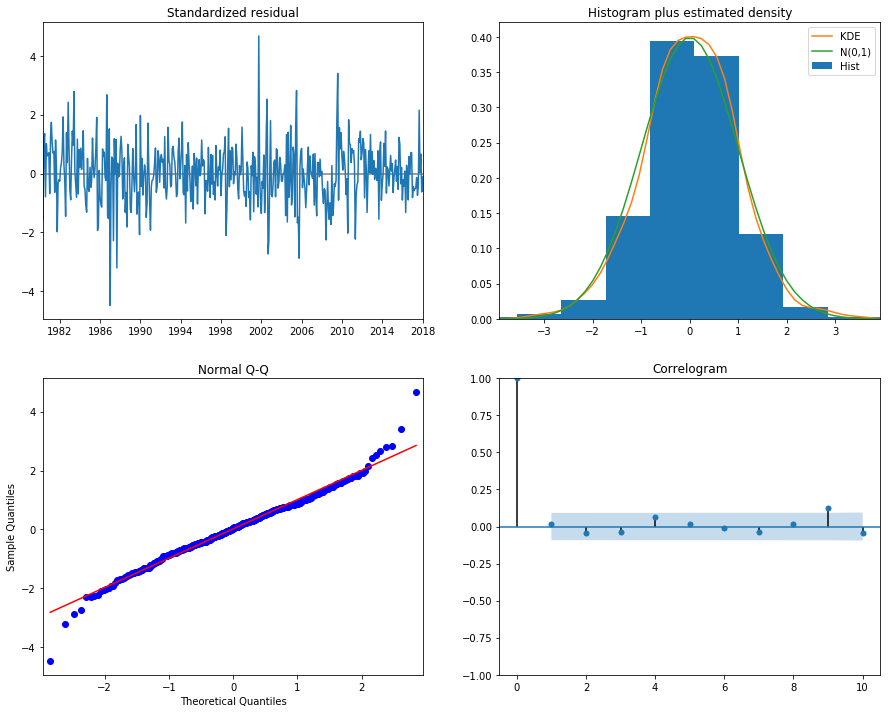

In [59]:
results.plot_diagnostics(figsize=(15, 12))
plt.show() # Residual plot of Light vehicle sales

### Based on above diagnostics we can see that residuals for light weight vehicles are highly uncorrelated and are random

### As KDE Line follows closely with the N(0,1) line, this is a good indication that residuals follow Normal Distribution with mean 0 and standard deviation 1

### The qq-plot on the bottom shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0,1). 

### Again, this is a strong indication that the residuals are normally distributed. 

### The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. this is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself. 

### Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

In [60]:
pred = results.get_prediction(start = pd.to_datetime('2005-01-01'), dynamic=False)

In [61]:
pred_ci = pred.conf_int()

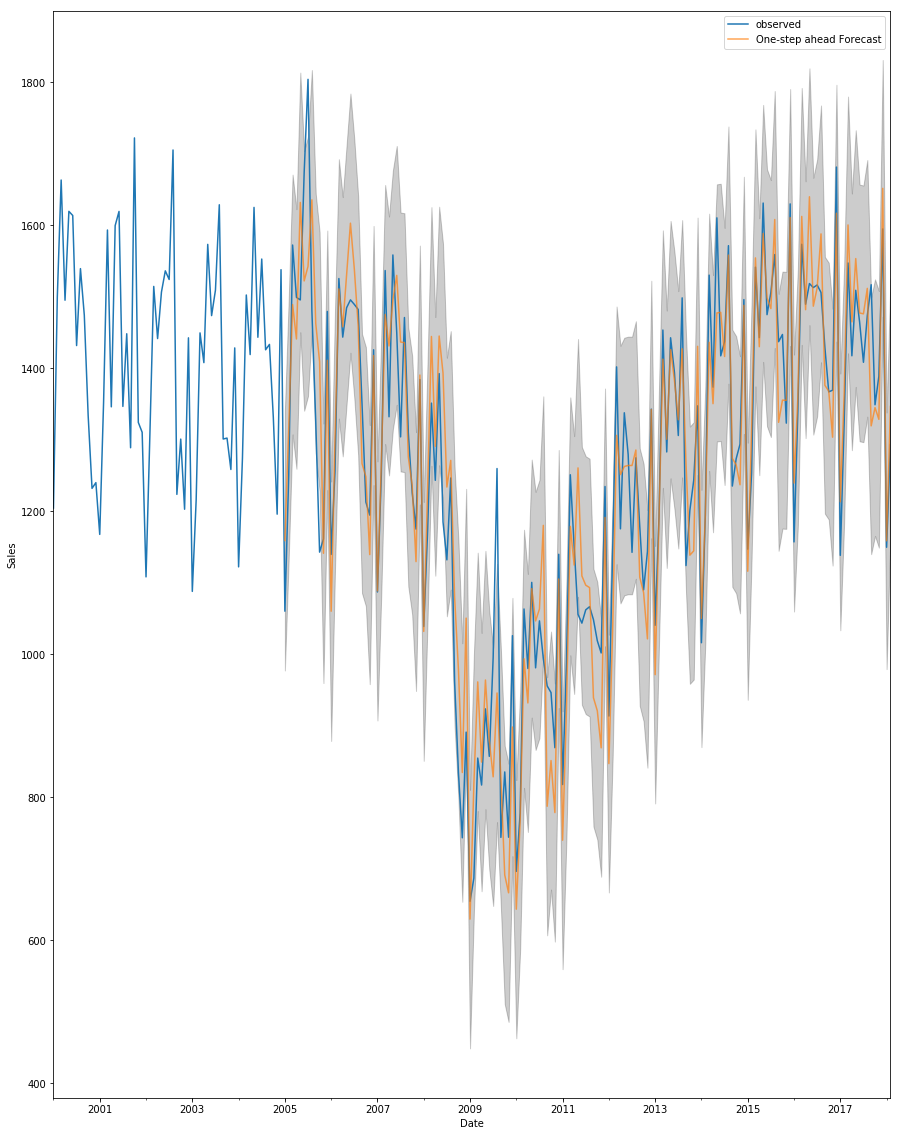

In [62]:
ax = series['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show() # Confidence interval for Light weight vehicle sales data which is a stationary data.

In [63]:
y_forecasted = pred.predicted_mean
y_truth = series['2005-01-01':]
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2))) 

The Mean Squared Error of our forecasts is 7554.61


### Here we can see that the one step forecasting error of LINEAR SARIMA process is 7554 which is quite high hence used neural netroworks to see it they can reduce Forecasting error 

## LSTM Neural Networks predicting Light weight vehicles Sales:

### The below is an LSTM Model containing 4 Neurons trained on a test data for 100 epochs to predict Light weight vehicle sales.

Month=1, Predicted=822.719251, Expected=744.400000
Month=2, Predicted=793.663385, Expected=1026.300000
Month=3, Predicted=891.597665, Expected=696.600000
Month=4, Predicted=769.663400, Expected=778.400000
Month=5, Predicted=785.328216, Expected=1063.600000
Month=6, Predicted=890.779998, Expected=980.400000
Month=7, Predicted=979.150968, Expected=1100.800000
Month=8, Predicted=1018.932047, Expected=981.300000
Month=9, Predicted=1003.526829, Expected=1047.000000
Month=10, Predicted=1020.618248, Expected=994.300000
Month=11, Predicted=1005.856157, Expected=956.000000
Month=12, Predicted=974.658995, Expected=946.700000
Month=13, Predicted=962.019754, Expected=869.600000
Month=14, Predicted=904.228174, Expected=1140.100000
Month=15, Predicted=1016.571042, Expected=818.100000
Month=16, Predicted=873.128526, Expected=987.900000
Month=17, Predicted=933.879697, Expected=1251.300000
Month=18, Predicted=1038.902183, Expected=1150.500000
Month=19, Predicted=1137.531011, Expected=1056.100000
Month=

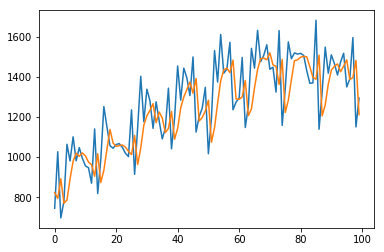

In [18]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = read_csv('LTOTALNSA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-100], supervised_values[-100:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-100:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-100:])
pyplot.plot(predictions)
pyplot.show()

## Conclusions:

### By comparing above prediction results of both Linear SARIMA and LSTM Models, we can say that Though Linear SARIMA(1,1,2)x(2,2,2,12)12 does a good job in explaining the underlying data generation process, LSTM models do a better job in forecasting Light weight vehicle sales as the error  of LSTM forecasting is 7000 times less than SARIMA Forecasting 